You are supposed to train and apply a boosting model for landcover classification. Below, you can find some code that already parses the data. For your submission, run and submit the extended jupyter notebook.

In [7]:
import numpy as np

In [27]:
# load data
train = np.load('./train.npz')
X_train = train["X"]
y_train = train["y"].reshape((-1,1))

test = np.load('./test.npz')
X_test = test["X"]
y_test = test["y"].reshape((-1,1))

classes = {
    1: "cultivated_land",
    2: "forest",
    3: "grassland",
    4: "shrubland",
    5: "water",
    8: "artificial_surface",
    9: "bareland"
}


In [3]:
print("Shape of training data: {}".format(X_train.shape))
print("Shape of training labels: {}".format(y_train.shape))
print("Shape of test data: {}".format(X_test.shape))
print("Shape of test labels: {}".format(y_test.shape))

Shape of training data: (6953, 12, 13, 13, 6)
Shape of training labels: (6953, 1)
Shape of test data: (1739, 12, 13, 13, 6)
Shape of test labels: (1739, 1)


The training and test set contain a few thousand instances. Each instance is based on image of size 13x13 pixels, which are available for 12 timestamps and 6 bands. That is, one is given an array of shape (12,13,13,6) for each instance. The label arrays contain the labels associated with the instances, where the central pixel/position determines the class of the (whole) image array for each instance, see below.

Label (i.e., class of pixel in the center of the images) for image sequence: forest


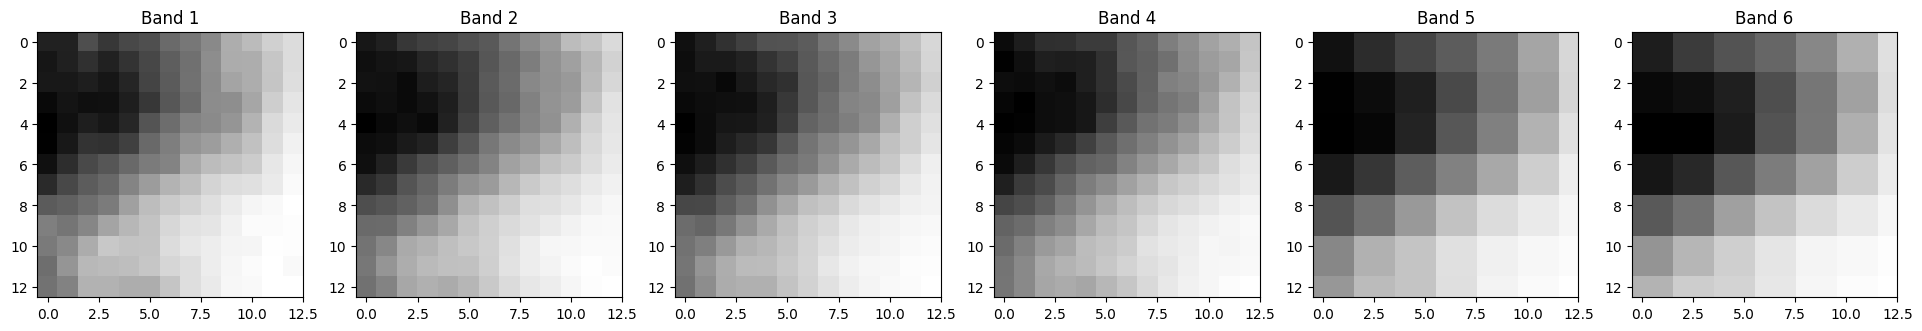

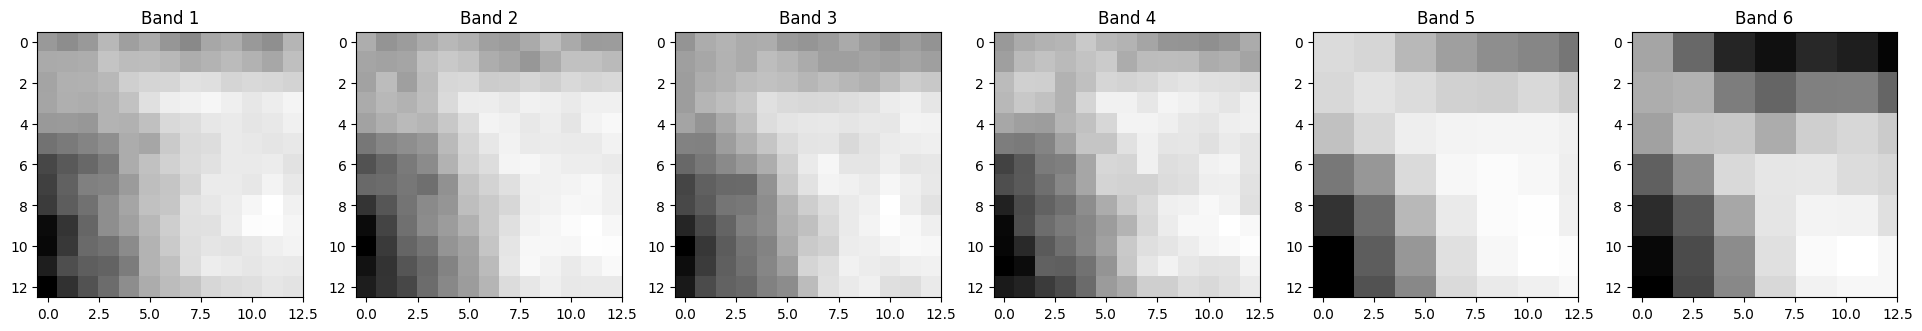

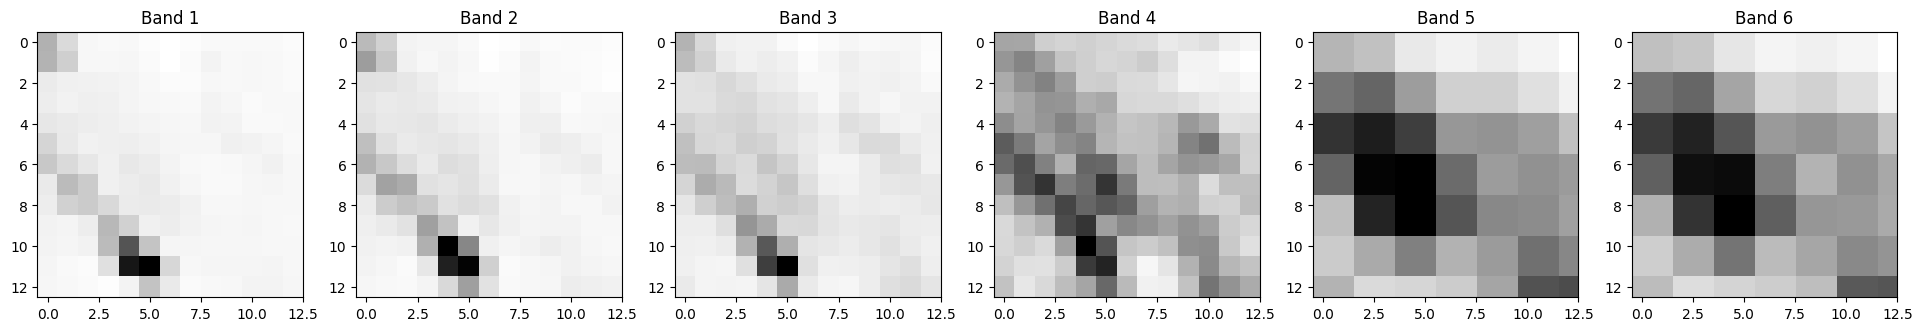

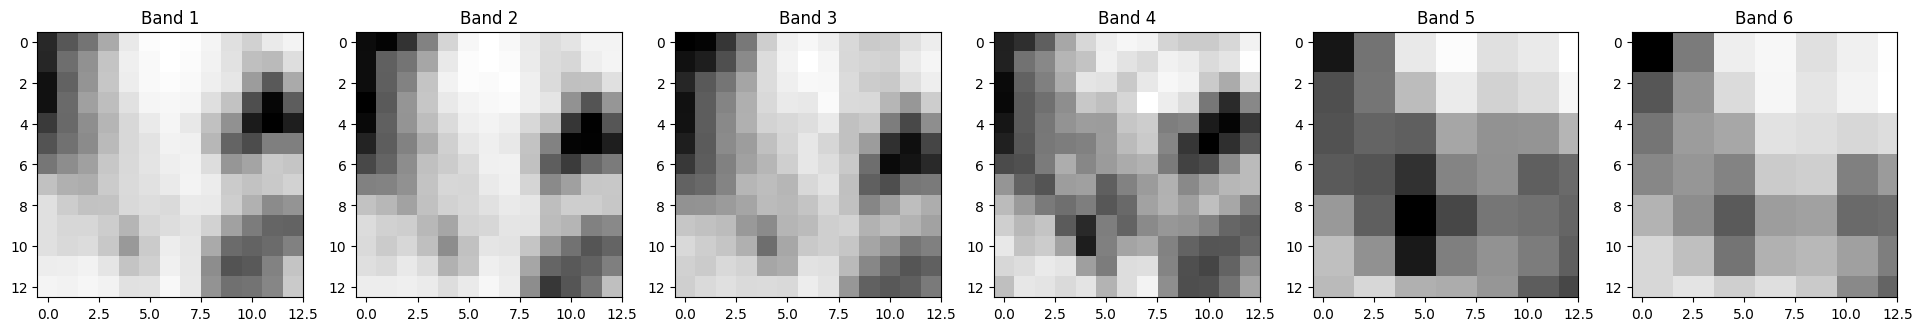

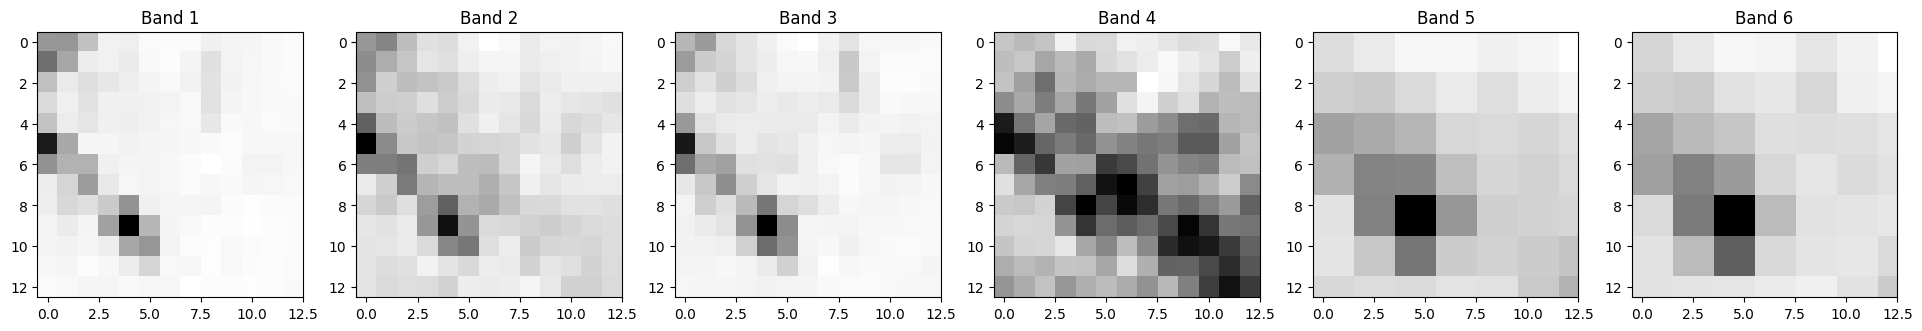

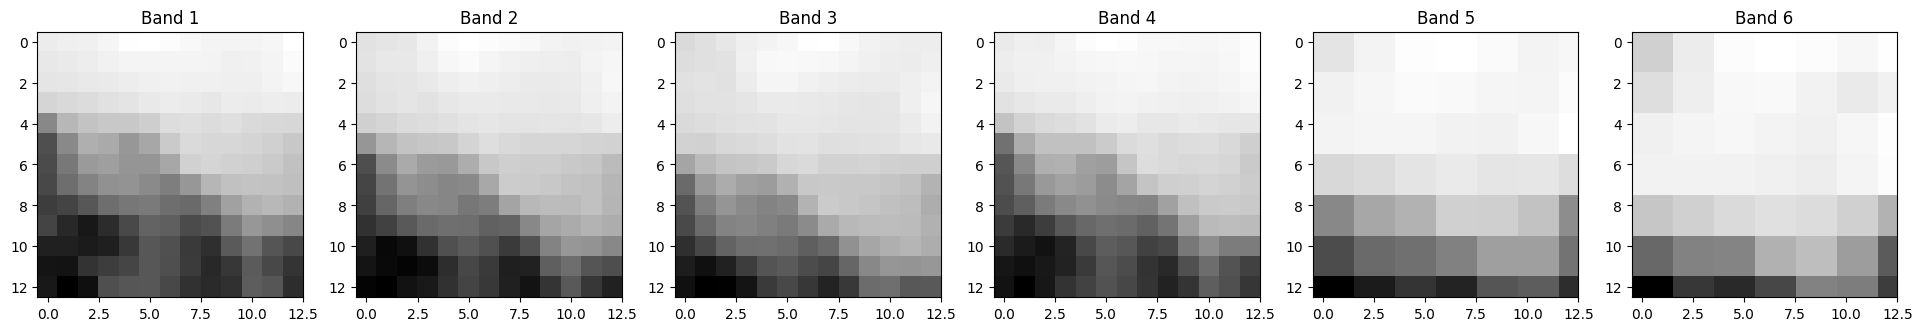

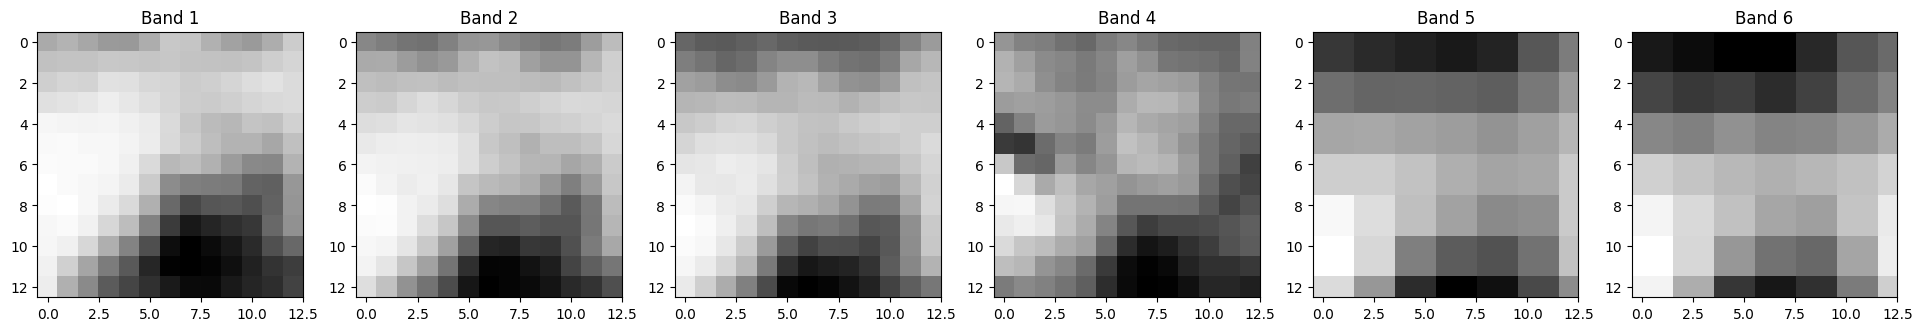

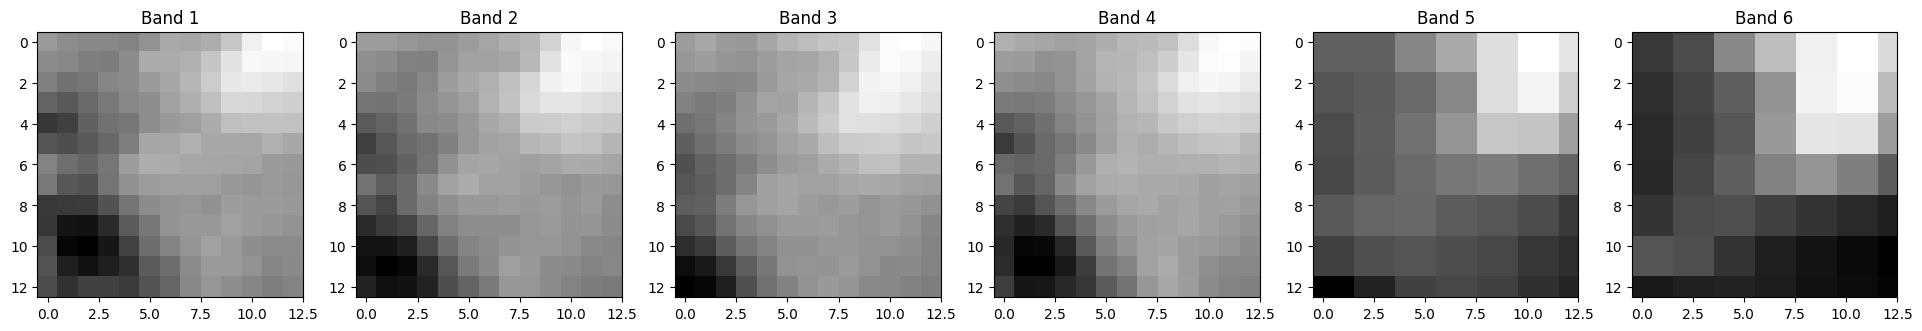

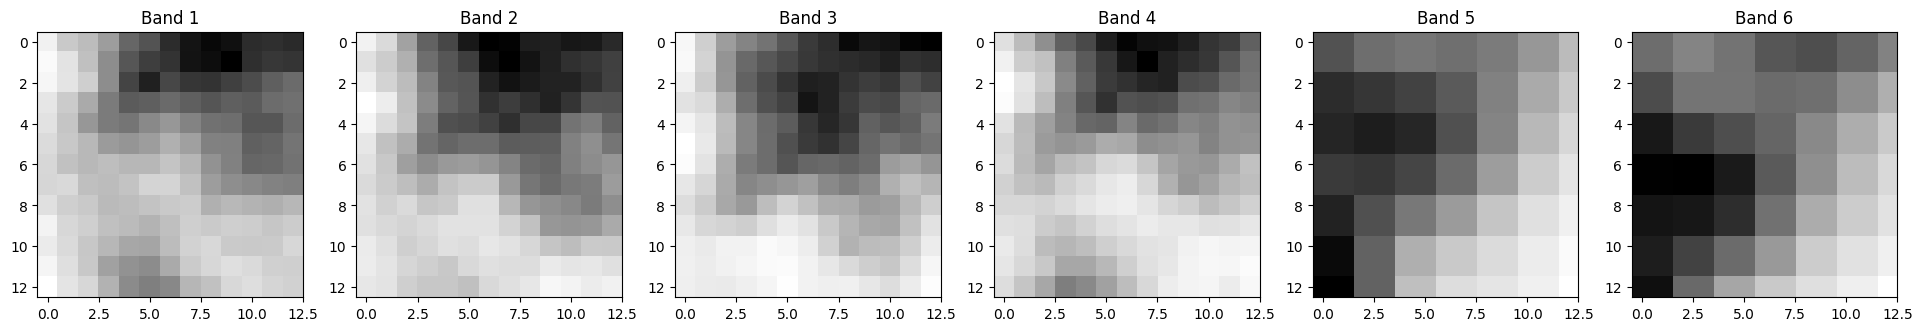

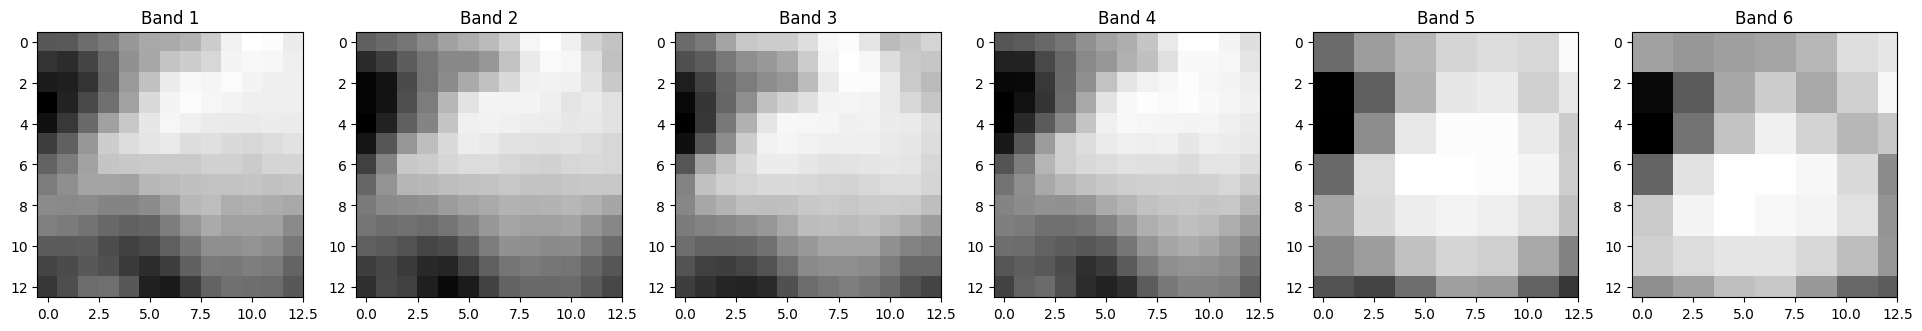

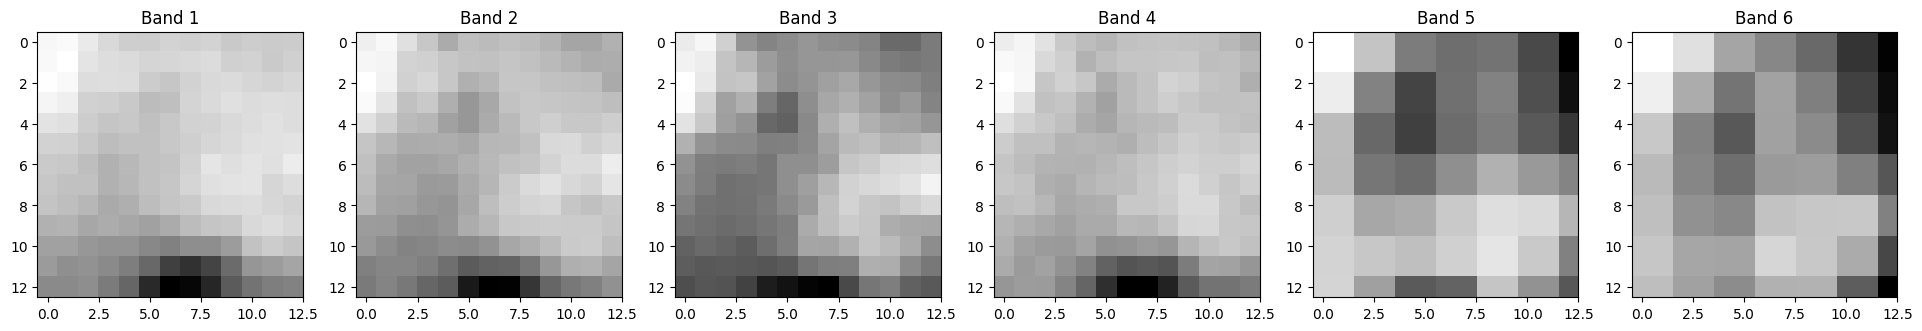

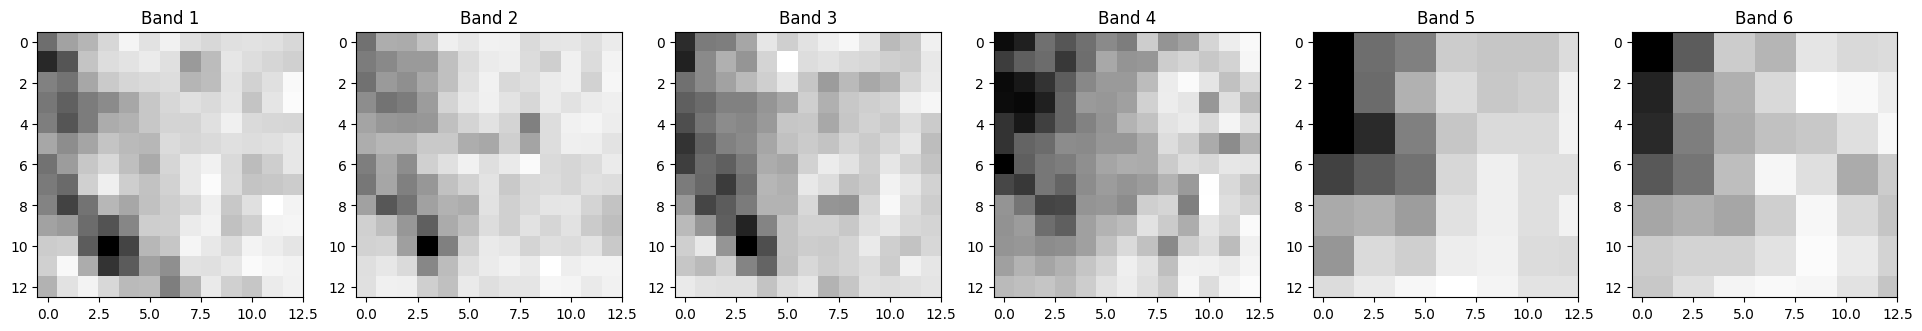

In [34]:
# visualize some of the (image) data

import matplotlib.cm as cm
import matplotlib.pyplot as plt

idx = 0

print("Label (i.e., class of pixel in the center of the images) for image sequence: {}".format(classes[y_train[idx,0]]))

for year in range(12):
    fig, axs = plt.subplots(1, 6, figsize=(24, 4))
    for b in range(6):
        axs[b].imshow(X_train[idx, year, :, :, b], cmap=plt.get_cmap("Greys"))
        axs[b].set_title("Band {}".format(b+1))

My code starts here

(6953, 72)
(6953,)


C:\Users\hjalt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\hjalt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.7193789534215066


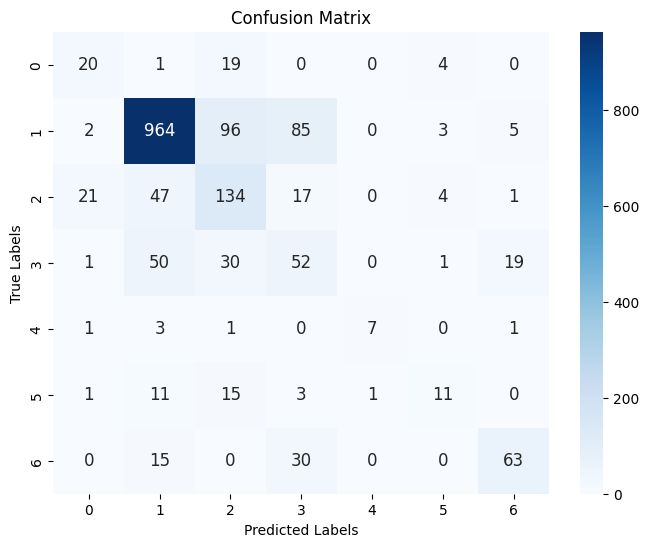

In [41]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

center_index = 6  # Size of the central region (1)

def get_center(img_arr):
    center = img_arr[:, :, center_index, center_index, :]
    flatten = center.reshape(center.shape[0], center.shape[1], center.shape[2], -1)
    flatten = flatten.reshape(flatten.shape[0], -1, flatten.shape[2])
    flatten = flatten.reshape(flatten.shape[0], -1)
    return flatten
# Transform input data
x_train = get_center(X_train)
x_test = get_center(X_test)
Y_train = np.ravel(y_train)
Y_test = np.ravel(y_test)
print(x_train.shape)
print(Y_train.shape)



param_grid = {
    'base_estimator__max_depth': [1, 2, 3],  # Depth of decision trees
    'n_estimators': [50, 100, 200]  # Number of boosted trees
}

estimatetor = DecisionTreeClassifier(criterion="gini")
ada_boost = AdaBoostClassifier(base_estimator=estimatetor, algorithm="SAMME")
gridsearch =GridSearchCV(ada_boost, param_grid, cv=2, scoring="accuracy", n_jobs=-1)
gridsearch.fit(x_train, Y_train)

# Get best model
best_model = gridsearch.best_estimator_
best_params = gridsearch.best_params_

# Refit the best model
best_model.fit(x_train, Y_train)

# Evaluation
test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
conf_matrix = confusion_matrix(Y_test, test_predictions)

print(f"Test set accuracy: {test_accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

